In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [33]:
df = pd.read_csv('/Users/cram/Downloads/train_data_tree.csv')

In [34]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [35]:
x = df[['sex', 'exang']]
y = df.num

In [36]:
clf.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

[Text(167.4, 181.2, 'X[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(83.7, 108.72, 'X[0] <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

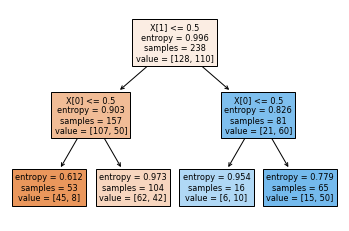

In [37]:
 tree.plot_tree(clf,filled=True)

In [38]:
l_node = clf.tree_.children_left[0] # индекс корня левого поддерева
n1 = clf.tree_.n_node_samples[l_node] # сэмплов в левом поддереве
e1 = clf.tree_.impurity[l_node] # энтропия в корне левого поддерева

r_node = clf.tree_.children_right[0] # индекс корня левого поддерева
n0 = clf.tree_.n_node_samples[r_node] # сэмплов в левом поддереве
e0 = clf.tree_.impurity[r_node] # энтропия в корне левого поддерева

In [39]:
N=n0+n1

In [40]:
IG = 0.996 - (n0*e0 + n1*e1)/N

In [41]:
IG

0.11952340688606711

In [43]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [44]:
iris = load_iris()
X = iris.data
y = iris.target

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, train_size=0.75)

In [65]:
dt = DecisionTreeClassifier()

In [66]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(125.55000000000001, 203.85, 'X[2] <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(83.7, 176.67000000000002, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(167.4, 176.67000000000002, 'X[2] <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0, 39, 38]'),
 Text(83.7, 149.49, 'X[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(41.85, 122.31, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(125.55000000000001, 122.31, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(251.10000000000002, 149.49, 'X[2] <= 5.05\ngini = 0.21\nsamples = 42\nvalue = [0, 5, 37]'),
 Text(209.25, 122.31, 'X[0] <= 6.5\ngini = 0.486\nsamples = 12\nvalue = [0, 5, 7]'),
 Text(167.4, 95.13, 'X[1] <= 3.1\ngini = 0.346\nsamples = 9\nvalue = [0, 2, 7]'),
 Text(125.55000000000001, 67.94999999999999, 'X[3] <= 1.65\ngini = 0.219\nsamples = 8\nvalue = [0, 1, 7]'),
 Text(83.7, 40.77000000000001, 'X[0] <= 6.15\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(41.85, 13.590

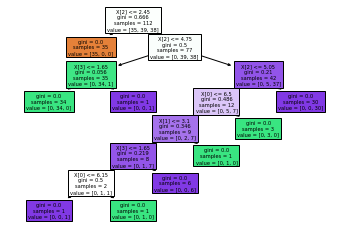

In [67]:
tree.plot_tree(dt,filled=True)

In [61]:
predicted = dt.predict(X_test)

In [62]:
predicted

array([1, 0, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2,
       0, 0, 2, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0])

In [68]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

In [69]:
iris = load_iris()
X = iris.data
y = iris.target

In [70]:
dt = DecisionTreeClassifier()

In [71]:
parametrs = {'criterion': ['entropy'],
             'max_depth': range(1,10),
             'min_samples_split': range(2,10),
             'min_samples_leaf': range(1,10)}

In [72]:
search = GridSearchCV(dt, parametrs)

In [73]:
search.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)})

In [74]:
best_tree = search.best_estimator_

In [75]:
best_tree

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [79]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris

In [80]:
iris = load_iris()
X = iris.data
y = iris.target

In [81]:
parametrs = {'criterion': ['entropy'],
             'max_depth': range(1,10),
             'min_samples_split': range(2,10),
             'min_samples_leaf': range(1,10)}

In [82]:
dt = DecisionTreeClassifier()

In [83]:
search = RandomizedSearchCV(dt, parametrs, n_iter=20)

In [84]:
search.fit(X, y)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['entropy'],
                                        'max_depth': range(1, 10),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10)})

In [85]:
best_tree = search.best_estimator_

In [86]:
best_tree

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3,
                       min_samples_split=5)